In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

from keras.applications import imagenet_utils
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
n_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [4]:
vgg_model = VGG16(weights='imagenet', include_top=False)

In [5]:
x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

In [6]:
model = Model(inputs=vgg_model.input, outputs=out)

In [7]:
for layer in vgg_model.layers:
    layer.trainable = False

In [8]:
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [9]:
callbacks = [EarlyStopping(monitor='val_acc', patience=5, verbose=0)]

In [10]:
n_epochs = 10
batch_size = 50
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=callbacks)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 891s 22ms/step - loss: 1.3631 - acc: 0.5218 - val_loss: 1.2297 - val_acc: 0.5736
Epoch 2/10
40000/40000 [==============================] - 674s 17ms/step - loss: 1.1736 - acc: 0.5896 - val_loss: 1.2327 - val_acc: 0.5709
Epoch 3/10
40000/40000 [==============================] - 478s 12ms/step - loss: 1.1033 - acc: 0.6098 - val_loss: 1.1366 - val_acc: 0.6043
Epoch 4/10
40000/40000 [==============================] - 479s 12ms/step - loss: 1.0450 - acc: 0.6314 - val_loss: 1.1468 - val_acc: 0.6053
Epoch 5/10
40000/40000 [==============================] - 480s 12ms/step - loss: 0.9974 - acc: 0.6497 - val_loss: 1.1316 - val_acc: 0.6073
Epoch 6/10
40000/40000 [==============================] - 479s 12ms/step - loss: 0.9533 - acc: 0.6656 - val_loss: 1.1038 - val_acc: 0.6170
Epoch 7/10
40000/40000 [==============================] - 481s 12ms/step - loss: 0.9060 - acc: 0.6826 - val_loss: 1.

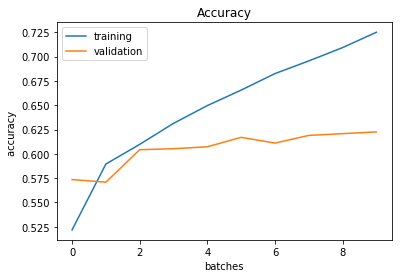

In [11]:
plt.plot(np.arange(len(history.history['acc'])), history.history['acc'], label='training')
plt.plot(np.arange(len(history.history['val_acc'])), history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.xlabel('batches')
plt.ylabel('accuracy ')
plt.legend(loc=0)
plt.show()